# Background

### Inspiration

<span style="font-size: 16px;">
One day while I was browsing IMDb one feature caught my attention. The movie recommendation feature that they call "More Like This." It recommends me movies that have the same "vibe" as the movie page I'm in. For example, in the screenshot below it shows movie recommendations that are similar to "Terminator 2: Judgment Day."
</span>&nbsp;

<img src="Screenshots/More Like This IMDb.PNG" width="450"/>&nbsp;

<span style="font-size: 16px;">
It piqued my interests because it shows movies that are not exactly similar, but similar nonetheless. It is very different from the usual recommendation system tutorial in the internet, where for a "Spider-Man" movie it recommends a horror comedy film titled "Arachnophobia." I mean sure, "Spider-Man" contain spiders and "Arachnophobia" ALSO contain spiders but that's not what users of a recommendation system hoped for is it?
</span>&nbsp;

<img src="Screenshots/Generic Tutorial.PNG" width="450"/>&nbsp;

<span style="font-size: 16px;">
So I research on how IMDb recommends movie better and fortunately it didn't take too long before I found how (non-specifically) they did it which can be found <a href="https://help.imdb.com/article/imdb/discover-watch/what-is-the-more-like-this-section/GPE7SPGZREKKY7YN?ref_=cons_tt_rec_lm#" target="_blank">here.</a> Basically it considers a lot of features like genres, country of origin, actors, and more. So based on that, I want to build a recommendation system that are as similar as possible to what IMDb offered
</span>

### Why Anime?

<span style="font-size: 16px;">
There are 2 main correlated reasons on why I choose anime. The first is that I needed it myself since I love anime and secondly, one of the biggest anime site, an anime equivalent of IMDb, doesn't have a "More Like This" feature like IMDb has and instead they use users recommendation feature which can be seen in the screenshot below
</span>&nbsp;

<img src="Screenshots/MyAnimeList Recommendations.PNG" width="600"/>&nbsp;

<span style="font-size: 16px;">
So based on that I hope that this anime recommender can be used as an alternative options for anime lovers out there and maybe can be a consideration for myanimelist website to implement a similar system like IMDb to recommend animes
</span>&nbsp;

# Datasets

<span style="font-size: 16px;">
This anime recommender system uses 2 different yet similar dataset that is available for download from Kaggle. The first dataset can be found <a href="https://www.kaggle.com/datasets/dbdmobile/myanimelist-dataset" target="_blank">here</a> (Credit to <a href="https://dataalchemyhub.me/portfolio-website/" target="_blank">Sajid</a>) and the second one can be found <a href="https://www.kaggle.com/datasets/andreuvallhernndez/myanimelist" target="_blank">here</a> (Credit to <a href="https://www.linkedin.com/in/andreu-vall-hern%C3%A0ndez-5a5344160" target="_blank">Andreu Vall Hernandez</a>). Please go visit the mentioned hyperlink if you're curious about the description of each features of each datasets, because I will not explain it here
</span>&nbsp;

In [1]:
import pandas as pd

first_dataset = pd.read_csv(r'../Dataset/anime-dataset-2023.csv')
secondary_dataset = pd.read_csv(r'../Dataset/anime.csv')

### First Dataset

In [2]:
first_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   anime_id      24905 non-null  int64 
 1   Name          24905 non-null  object
 2   English name  24905 non-null  object
 3   Other name    24905 non-null  object
 4   Score         24905 non-null  object
 5   Genres        24905 non-null  object
 6   Synopsis      24905 non-null  object
 7   Type          24905 non-null  object
 8   Episodes      24905 non-null  object
 9   Aired         24905 non-null  object
 10  Premiered     24905 non-null  object
 11  Status        24905 non-null  object
 12  Producers     24905 non-null  object
 13  Licensors     24905 non-null  object
 14  Studios       24905 non-null  object
 15  Source        24905 non-null  object
 16  Duration      24905 non-null  object
 17  Rating        24905 non-null  object
 18  Rank          24905 non-null  object
 19  Popu

<span style="font-size: 16px;">
There are 23 unique features in the first dataset, but I will not be using it all. For the recommendation system, the features will be used from the first dataset are Genres, Synopsis, Type, Producers, Studios, Source, and Rating
</span>&nbsp;

### Second Dataset

In [3]:
secondary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24985 entries, 0 to 24984
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anime_id          24985 non-null  int64  
 1   title             24985 non-null  object 
 2   type              24927 non-null  object 
 3   score             16050 non-null  float64
 4   scored_by         24985 non-null  int64  
 5   status            24985 non-null  object 
 6   episodes          24438 non-null  float64
 7   start_date        24110 non-null  object 
 8   end_date          22215 non-null  object 
 9   source            21424 non-null  object 
 10  members           24985 non-null  int64  
 11  favorites         24985 non-null  int64  
 12  episode_duration  24387 non-null  object 
 13  total_duration    24162 non-null  object 
 14  rating            24405 non-null  object 
 15  sfw               24985 non-null  bool   
 16  approved          24985 non-null  bool  

<span style="font-size: 16px;">
There are 38 unique features in the secondary dataset and since I've got the main features from the first dataset I will only be using "themes" feature to complement the first dataset.
</span>&nbsp;

# System Design

### Content-Based Approach

<span style="font-size: 16px;">
The recommendation system will be using a Content-Based approach that utilize the item features, in this case Anime features. According to this <a href="https://arxiv.org/ftp/arxiv/papers/2109/2109.08794.pdf" target="_blank">paper</a>, a content-based recommendation system generates appropriate recommendations for a user based on their recent behaviours according to what the user liked, bought or watched. Generally the process of content-based recommendation system can be summarized into 3 steps; item representations, learning user preferences, and recommendation(s) generation. A visualization of content-based recommendation system can be viewed below
</span>&nbsp;

<img src="Screenshots/Content-Based Approach.PNG" width="450"/>&nbsp;

### Anime Recommendation System Methodologies

<span style="font-size: 16px;">
The anime recommendation system will convert the item features of each Anime; Genres, Synopsis, Type, Producers, Studios, Source, Rating, and Themes into a big features matrix and then do unsupervised clustering on it. Genres, Themes, Type, Producers, Studios, Source, and Rating will be turned into a dummy matrix and then reduce its dimension using dimension reduction techniques. Synopsis features will be vectorized using vectorization techniques to generate a synopsis feature matrix. Both of these mentioned matrix will be concatenated and then clustered based on their similarities. A visualization of the anime recommendation system methodologies can be viewed below
</span>&nbsp;

&nbsp;<img src="Graphic Drawing/Methodologies.PNG" width="750"/>&nbsp;

<span style="font-size: 16px;">
The reason behind the clustering of Animes are to determine the boundaries on how many Animes can be recommended by statistical means. Usually recommendation systems recommend top-k animes which I personally think have one big weakness. Recommending top-k Animes couldn't work if the anime are unique enough there aren't many Animes like it. For example, if only 5 Animes are similar, recommending top 10 Animes would results in the other 5 aren't similar and therefore produce inaccuracy
</span>&nbsp;

# System Design Implementation

<span style="font-size: 16px;">
This part will explain the system design implementation in-depth, including the specific methods used and its reasoning. The implementation will start from converting the anime/item features into anime features matrix until recommendation generation step. The data loading will not be included because the dataset already been loaded in the beginning.
</span>&nbsp;

### Convert into Feature Matrix

<span style="font-size: 16px;">
This section will show the implementation of conversion of Genres, Rating, Type, Synopsis, Producers, Studios, and Source into feature matrix. Feature selection from the original dataframe is done then convert it into sparse dummy variable matrix then finally do dimension reduction on it to generate a feature matrix.
</span>&nbsp;

**Feature Selection**

In [4]:
#Selecting Features from the First Dataset
main_mini = first_dataset[first_dataset['Score'] != 'UNKNOWN'][['anime_id', 'Name', 'English name', 'Genres', 
                                                                'Rating', 'Type', 'Synopsis', 
                                                                'Producers', 'Studios', 'Source']]
main_mini['Rating'] = main_mini['Rating'].replace({'R - 17+ (violence & profanity)': 'R - 17+'})
main_mini['Rating'] = main_mini['Rating'].replace({'R+ - Mild Nudity': 'R - 17+'})
main_mini['Name'] = main_mini.apply(lambda row: row['Name'] if row['English name'] == 'UNKNOWN' else row['English name'], axis=1)
main_mini = main_mini.drop(columns=['English name'])


#Selecting Features from the Secondary Dataset
secondary_mini = secondary_dataset[['anime_id', 'themes']]

#Merging the Selected Features from the Main and Secondary Dataset
merged_df = pd.merge(main_mini, secondary_mini, on='anime_id', how='inner')

#Display the Results
merged_df

,anime_id,Name,Genres,Rating,Type,Synopsis,Producers,Studios,Source,themes
0,1,Cowboy Bebop,"Action, Award Winning, Sci-Fi",R - 17+,TV,"Crime is timeless. By the year 2071, humanity ...",Bandai Visual,Sunrise,Original,"['Adult Cast', 'Space']"
1,5,Cowboy Bebop: The Movie,"Action, Sci-Fi",R - 17+,Movie,"Another day, another bounty—such is the life o...","Sunrise, Bandai Visual",Bones,Original,"['Adult Cast', 'Space']"
2,6,Trigun,"Action, Adventure, Sci-Fi",PG-13 - Teens 13 or older,TV,"Vash the Stampede is the man with a $$60,000,0...",Victor Entertainment,Madhouse,Manga,['Adult Cast']
3,7,Witch Hunter Robin,"Action, Drama, Mystery, Supernatural",PG-13 - Teens 13 or older,TV,Robin Sena is a powerful craft user drafted in...,"Bandai Visual, Dentsu, Victor Entertainment, T...",Sunrise,Original,['Detective']
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Supernatural",PG - Children,TV,It is the dark century and the people are suff...,"TV Tokyo, Dentsu",Toei Animation,Manga,[]
...,...,...,...,...,...,...,...,...,...,...
15685,55355,Lee's Detective Agency: A Day in Lungmen - Hom...,"Action, Comedy, Mystery",PG-13 - Teens 13 or older,ONA,"Infiltrating, disguising, and raiding. Tonight...",UNKNOWN,"HMCH, Gravity Well",Game,"['Anthropomorphic', 'Detective']"
15686,55404,Slash,UNKNOWN,PG-13 - Teens 13 or older,Music,Music video for the song Slash by yama.\n\nThe...,MAZRI,UNKNOWN,Original,['Music']
15687,55517,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN,PG-13 - Teens 13 or older,Special,Recap of the first seven episodes of The IDOLM...,UNKNOWN,CygamesPictures,Web manga,"['Idols (Female)', 'Music']"
15688,55647,One Piece: Recapping Fierce Fights! The Counte...,"Action, Adventure, Comedy, Fantasy",PG-13 - Teens 13 or older,Special,This is the 8th recap special of the Wano arc.,UNKNOWN,UNKNOWN,Manga,[]


<span style="font-size: 16px;">
From the dataframe above I will be using only the Genres, Rating, Type, Synopsis, Producers, Studios, Source, and Themes. The remaining 2 columns which is anime_id and Name will only be used later for testing purposes.
</span>&nbsp;

**Generating Dummy Variables Matrix from Genres, Rating, Type, Producers, Studios, Source, and Themes Features**

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import ast

# Task 1: Concat themes and genres columns then change it into one hot encoded
# Function to convert string representation of list to comma-separated string
def convert_to_comma_string(themes_string):
    try:
        themes_list = ast.literal_eval(themes_string)
        return ', '.join(map(str, themes_list))
    except (SyntaxError, ValueError):
        return ''  # Handle cases where the string cannot be evaluated as a list

# Apply the function to the 'themes' column
merged_df['themes'] = merged_df['themes'].apply(convert_to_comma_string)

# Concatenate strings from Column1 and Column2, handling empty strings and strings with only spaces
merged_df['themes_genres'] = merged_df.apply(
    lambda row: (
        row['themes'].strip() + ', ' + row['Genres'].strip()
        if (row['themes'].strip() and row['Genres'].strip())
        else row['themes'].strip() + row['Genres'].strip()
    ),
    axis=1
)

# Split the comma-separated genres/themes into lists
merged_df['themes_genres'] = merged_df['themes_genres'].apply(lambda x: x.split(', ') if x else [])

# Use pd.get_dummies to obtain binary matrix
themes_genres_encoded = pd.get_dummies(merged_df['themes_genres'].explode(), prefix='', prefix_sep='')

# Convert boolean values to integers (0 and 1)
themes_genres_encoded = themes_genres_encoded.astype(int)

# Aggregate the results by grouping on the index (level=0) and summing
themes_genres_encoded = themes_genres_encoded.groupby(level=0).max()

# Task 2: Change producers column into one hot encoded
merged_df['Producers'] = merged_df['Producers'].apply(lambda x: x.split(', ') if x else [])
producers_encoded = pd.get_dummies(merged_df['Producers'].explode(), prefix='', prefix_sep='')
producers_encoded = producers_encoded.astype(int)
producers_encoded = producers_encoded.groupby(level=0).max()

# Task 3: Change studios column into one hot encoded
merged_df['Studios'] = merged_df['Studios'].apply(lambda x: x.split(', ') if x else [])
studios_encoded = pd.get_dummies(merged_df['Studios'].explode(), prefix='', prefix_sep='')
studios_encoded = studios_encoded.astype(int)
studios_encoded = studios_encoded.groupby(level=0).max()

# Task 4: Change type column into one hot encoded
type_encoded = pd.get_dummies(merged_df['Type'].explode(), prefix='', prefix_sep='')
type_encoded = type_encoded.astype(int)
type_encoded = type_encoded.groupby(level=0).max()

# Task 5: Change rating column into one hot encoded
rating_encoded = pd.get_dummies(merged_df['Rating'].explode(), prefix='', prefix_sep='')
rating_encoded = rating_encoded.astype(int)
rating_encoded = rating_encoded.groupby(level=0).max()

# Task 6: Change Source column into one hot encoded
source_encoded = pd.get_dummies(merged_df['Source'].explode(), prefix='', prefix_sep='')
source_encoded = rating_encoded.astype(int)
source_encoded = rating_encoded.groupby(level=0).max()

In [6]:
# Generate dummy variables matrix
dummyvar_matrix = pd.concat([themes_genres_encoded, producers_encoded, studios_encoded, 
                            type_encoded, rating_encoded], axis=1)

dummyvar_matrix

,Action,Adult Cast,Adventure,Anthropomorphic,Avant Garde,Award Winning,Boys Love,CGDCT,Childcare,Combat Sports,...,OVA,Special,TV,UNKNOWN,G - All Ages,PG - Children,PG-13 - Teens 13 or older,R - 17+,Rx - Hentai,UNKNOWN
0,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15687,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
15688,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


<span style="font-size: 16px;">
The dataframe above shows the dummy variables matrix generated from the related anime/item features. There are duplicate UNKNOWN columns, I can convert it to other names for interpretability but didn't to save time, it shouldn't have any performance impact since it will be considered a different coordinate
</span>&nbsp;

**Dimension Reduction**

<span style="font-size: 16px;">
Based on this <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html" target="_blank">sklearn documentation article</a>, Truncated SVD can handle dimensional reduction on sparse data. Truncated SVD will be done on the dummy variable matrix with scree plot to determine the optimal number n_components
</span>&nbsp;

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

def truncated_svd(X):
    """
    Visualize the scree plot for Truncated SVD and automatically locate elbow point

    Parameters:
    - X: Input data (features in rows, samples in columns)

    Returns:
    - None (plots the scree plot)
    """
    
    # Fit Truncated SVD
    svd = TruncatedSVD(n_components=X.shape[1] - 1)
    svd.fit(X)

    # Explained variance ratio
    explained_variance_ratio = svd.explained_variance_ratio_

    # Cumulative explained variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    
    # Scree plot
    plt.figure(figsize=(12, 6))

    # Cumulative Explained Variance Plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
    plt.title('Cumulative Explained Variance Plot')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

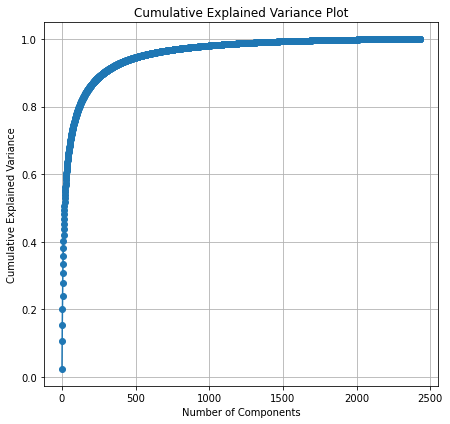

In [8]:
truncated_svd(dummyvar_matrix)

Scree plot shows that the elbow point is located approximately at 85% explained variance, so I will use 85% explained variance threshold for the n_components dimensional reduction

In [9]:
def truncated_svd_target_variance(X, target_variance=0.85):
    """
    Reduce dimensionality using Truncated SVD to achieve a target explained variance ratio.

    Parameters:
    - X: Input data (features in rows, samples in columns)
    - target_variance: Target explained variance ratio (default is 0.85)

    Returns:
    - X_reduced: Data with reduced dimensionality
    """

    # Fit Truncated SVD
    svd = TruncatedSVD(n_components=X.shape[1] - 1)
    svd.fit(X)

    # Explained variance ratio
    explained_variance_ratio = svd.explained_variance_ratio_

    # Cumulative explained variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # Find the number of components for target explained variance
    n_components = np.argmax(cumulative_explained_variance >= target_variance) + 1

    # Perform Truncated SVD with the selected number of components
    svd = TruncatedSVD(n_components=n_components)
    X_reduced = svd.fit_transform(X)
    
    # Convert to DataFrame
    X_reduced = pd.DataFrame(X_reduced, columns=[f"Component_{i+1}" for i in range(n_components)])

    
    return X_reduced

In [10]:
dummyvar_matrix_reduced = truncated_svd_target_variance(dummyvar_matrix)

dummyvar_matrix_reduced

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,Component_168,Component_169,Component_170,Component_171,Component_172,Component_173,Component_174,Component_175,Component_176,Component_177
0,0.942332,-0.704526,0.149750,1.174714,0.559385,0.065916,0.965944,-0.318397,-0.248492,0.267967,...,-0.004317,0.036078,0.018488,-0.023294,-0.005152,0.019877,0.016304,-0.023965,-0.008602,-0.016592
1,0.762227,-0.332417,0.438148,1.239904,-0.137455,0.153406,0.912076,0.152956,-0.478969,-0.491450,...,-0.022788,0.017421,0.016716,-0.025799,0.009365,-0.014665,0.025823,-0.021530,0.029264,0.035613
2,1.403889,-0.941954,-0.187070,0.726876,0.247647,0.574115,-0.007779,-0.135157,-0.579149,0.538382,...,0.101259,0.040630,-0.000331,-0.157348,0.116904,0.091840,-0.049431,0.038264,-0.097893,0.043762
3,1.363266,-0.934109,-0.254268,0.422929,0.519227,0.611879,0.281141,0.310624,0.296622,0.082539,...,0.042623,-0.109740,-0.103373,-0.149899,-0.144661,0.174149,0.013075,0.106115,-0.058008,0.156149
4,0.901093,-0.504873,-0.168858,0.760548,0.312645,-0.513937,-1.046101,-0.025810,0.357533,0.511056,...,-0.048619,0.025908,-0.013508,0.012460,0.006930,-0.020002,-0.024005,-0.024589,0.012850,-0.035467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685,1.631892,-0.182982,-0.000739,-0.369038,-0.801526,0.090638,0.211424,-0.580238,-0.049830,-0.073121,...,0.006234,0.003091,0.036038,-0.001788,-0.008895,0.013144,-0.019566,-0.014488,0.001153,-0.014045
15686,0.907669,0.951986,-0.528081,-0.340854,0.695521,1.189227,-0.170835,-0.370341,-0.183748,-0.583425,...,-0.016866,0.000414,0.001011,0.006037,-0.002249,-0.007982,-0.000414,-0.010164,0.007045,-0.000823
15687,1.175433,0.684666,-0.293328,-0.629795,-0.304608,0.923807,0.252398,-0.408648,0.375807,0.201778,...,0.015315,-0.000983,-0.004999,0.002927,0.004203,0.025611,-0.017427,0.058400,-0.022422,-0.009844
15688,2.154834,0.083595,0.049755,0.055484,-0.941963,-0.074365,-0.614652,-0.695766,-0.200032,-0.278074,...,-0.010397,0.005670,0.014913,0.005776,0.013553,0.001567,-0.003376,0.006889,-0.012221,0.002254


The data have been reduced into 177 columns after the truncated svd with 85% explained variance threshold. The previously sparse data are now a dense high-dimensional data

### Text Vectorization

<span style="font-size: 16px;">
This part contains 2 step, text preprocessing and vectorization. The first step is text preprocessing and after preprocessing is done it will continue to vectorization process. Methods used in each step will be explained below
</span>&nbsp;

**Text Preprocessing**

For text preprocessing step, I will be using the recommendations flowchart contain in this <a href="https://journals.sagepub.com/doi/10.1177/1094428120971683" target="_blank">paper</a>. The flowchart suggest text preprocessing steps based on conditions our dataset has and what our end goal of the data mining. Below are the visualization of the flowchart that contained in the mentioned paper

&nbsp;<img src="Screenshots/Text Preprocessing Flowchart.jpeg" width="350"/>&nbsp;

Based on the flowchart above it is needed to investigate the characteristics of the used dataset before determining the correct text preprocessing steps. Since this case will be clustering problem, so it is a topic modelling case, but let's investigate the average length of each document in the dataset with the code below. Based on the paper, an average document length of less than 500 words are considered short while otherwise is considered long

In [11]:
# Investigating the average synopses length
average_length = merged_df['Synopsis'].apply(lambda x: len(str(x).split())).mean()

if average_length < 500:
    print(f'The average length of synopses is: {average_length:.2f} words and is considered short')
else:
    print(f'The average length of synopses is: {average_length:.2f} words and is considered long')

The average length of synopses is: 72.54 words and is considered short


Based on the code above now we knew that the documents contained in the dataset are considered short, so the final text preprocessing process that will be used in implementing the recommendation system will be the following: 

**Lowercase Handling --> Handle Negations --> Correct Spelling Errors --> Expand Contractions & Abbreviation --> Remove Non-Alphabetic Characters**

The code that will implement the above steps can be run below

In [12]:
#Importing the Needed Library
import re
from spello.model import SpellCorrectionModel
from word2number import w2n
from pycontractions import Contractions

#Here I will be using the lightest model available from gensim
cont = Contractions(api_key="glove-wiki-gigaword-50")
cont.load_models()

#Using the lightest model for spell correction
sp = SpellCorrectionModel(language='en')
sp.load('en.pkl')
sp.set_default_config()

#Creating the preprocess function for better readibility
def preprocess_synopses(df):
    # Step 1: Convert to Lowercase
    df['Synopsis'] = df['Synopsis'].apply(lambda x: x.lower())

    # Step 2: Handle Negation in Words
    df['Synopsis'] = df['Synopsis'].apply(lambda x: re.sub(r'\b(?:not|no|never)\b', 'negation', x))

    # Step 3: Correct Spelling Errors
    df['Synopsis'] = df['Synopsis'].apply(lambda x: sp.spell_correct(x)['spell_corrected_text'])

    # Step 4: Expand contractions and abbreviations
    df['Synopsis'] = df['Synopsis'].apply(lambda x: list(cont.expand_texts([x], precise=True))[0])

    # Step 5: Remove non-alphabetic and non-ASCII characters
    df['Synopsis'] = df['Synopsis'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
        
    return df

#Apply the function
merged_df = preprocess_synopses(merged_df)

#Saving the preprocessed synopses into new variable 
synopses = merged_df['Synopsis']

#Show snippet of preprocessed synopses
synopses

C:\Users\hello\anaconda3\lib\site-packages\spello\model.py:301: UserWarning: This model was saved on spell<1.3.0. As such due to a bug in previous versions, none of customisations made to the config at the time of training were saved along with the model. It is recommended to load the model, apply all required customizations to config and save it again. E.g.

from spello.model import SpellCorrectionModel 
sp = SpellCorrectionModel(language='en')  
sp.load('/home/ubuntu/model.pkl')
sp.config.min_length_for_spellcorrection = 4 # default is 3
sp.config.max_length_for_spellcorrection = 12 # default is 15
sp.save(model_save_dir='/home/ubuntu/')

After this the model will load without any warnings

  warnings.warn("This model was saved on spell<1.3.0. As such due to a bug in previous versions, "


0        crime is timeless  by the year   humanity has ...
1        another day  another bountysuch is the life of...
2        vash the stamped is the man with a     bounty ...
3        robin some is a powerful craft user drafted in...
4        it is the dark century and the people are suff...
                               ...                        
15685    infiltrating  disguising  and raiding  tonight...
15686    music video for the song slash by gama \n\nthe...
15687    recap of the first seven episodes of the idolm...
15688         this is the th recap special of the when arc
15689     music video for the song fins by tsunami wartime
Name: Synopsis, Length: 15690, dtype: object

In [13]:
synopses[0]

'crime is timeless  by the year   humanity has expanded across the galaxy  filling the surface of other planets with settlements like those on earth  these new societies are plagued by murder  drug use  and theft  and intergalactic outlaws are hunted by a growing number of tough bounty hunters \n\nspike spiegel and jet black pursue criminals throughout space to make a humble living  beneath his goofy and aloof demeanor  spike is haunted by the weight of his violent past  meanwhile  jet manages his own troubled memories while taking care of spike and the bebop  their ship  the duo is joined by the beautiful con artist faye valentine  odd child edward wong how people tversky iv  and ein  a engineered welsh charge \n\nwhile developing bonds and working to catch a colorful cast of criminals  the bebop crews lives are disrupted by a menace from spikes past  as a rivals monical plot continues to unravel  spike must choose between life with his newfound family or revenge for his old wounds'

**There are still some noises in the data after the preprocessing, I'll deal with it later in the vectorization step where the issues will be addressed**

**Vectorization**

For text vectorization, I will be using doc2vec vectorization method with parameters found in this [paper](https://ieeexplore.ieee.org/document/9154163). The paper used a 128 long dimension and distributed bag-of-words algorithm for vectorization for a movie recommender system, since it has similar case study and have good results in the evaluation, I decided to follow it.

In [14]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

def vectorize_synopses(df, dm=0, vector_size=128):
    
    # Handling unresolved issues from preprocessing step
    df['Synopsis'] = df['Synopsis'].str.replace(r'[/\\]n', '').replace('\n\n', '') 

    df['Synopsis'] = df['Synopsis'].apply(lambda x: ' '.join(x.split()))

    # Ensure that the 'Synopsis' column is of type string
    df['Synopsis'] = df['Synopsis'].astype(str)

    # Create TaggedDocuments for training the Doc2Vec model
    tagged_data = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(df['Synopsis'])]

    # Initialize and train the Doc2Vec model
    model = Doc2Vec(dm=dm, vector_size=vector_size)
    model.build_vocab(tagged_data)
    model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

    # Transform synopses to vectors
    vectors = [model.infer_vector(doc.split()) for doc in df['Synopsis']]

    # Create a new DataFrame with the vectors
    vectors_df = pd.DataFrame(vectors, columns=[f'doc2vec_{i}' for i in range(vector_size)])

    return vectors_df

synopses_vectors = vectorize_synopses(merged_df)

synopses_vectors

,doc2vec_0,doc2vec_1,doc2vec_2,doc2vec_3,doc2vec_4,doc2vec_5,doc2vec_6,doc2vec_7,doc2vec_8,doc2vec_9,...,doc2vec_118,doc2vec_119,doc2vec_120,doc2vec_121,doc2vec_122,doc2vec_123,doc2vec_124,doc2vec_125,doc2vec_126,doc2vec_127
0,0.167608,-0.084720,-0.390801,-0.040117,0.101566,0.052218,-0.098498,0.045848,-0.021095,0.512721,...,0.052451,0.122886,0.107481,0.425429,-0.111431,-0.053307,0.080125,0.154999,0.210255,0.219002
1,0.061475,0.006709,-0.291751,-0.076503,0.025865,0.002568,-0.006997,0.047128,-0.038636,0.275979,...,0.224178,0.042098,0.141542,0.217519,0.007156,0.116201,-0.010120,-0.003292,0.399483,-0.042419
2,0.160821,-0.005434,-0.290471,-0.054113,0.248653,-0.074474,-0.060532,-0.112063,-0.055620,0.443485,...,0.268771,0.171876,0.244156,0.098212,-0.253252,0.087280,0.178244,0.021244,0.300262,-0.089522
3,0.153004,-0.039081,-0.243611,-0.142872,0.043535,-0.078610,-0.204713,0.014999,-0.096523,0.317327,...,0.059801,0.158872,0.018561,0.190270,-0.093979,-0.006787,-0.000601,0.130643,0.246605,-0.084172
4,0.253807,0.015251,-0.110445,0.051516,0.015597,-0.166554,0.045112,0.010575,0.122572,0.445028,...,0.068247,-0.000128,-0.002921,0.227039,-0.062659,0.065490,0.229460,-0.032004,0.327543,0.031047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685,0.130469,0.137447,-0.290341,-0.061926,0.141493,0.041628,-0.181998,0.026669,0.008898,0.348848,...,0.097708,0.103181,-0.033768,0.174128,-0.011073,-0.010614,0.027676,-0.051863,0.250260,0.021374
15686,0.079201,0.071668,-0.256282,-0.068838,0.080210,0.047246,-0.302621,-0.016874,-0.042786,0.291970,...,-0.081067,0.247147,-0.019933,0.278298,0.040464,-0.075198,-0.008811,-0.126398,0.280839,0.017216
15687,0.085917,0.130937,-0.211812,-0.082219,0.056953,0.039075,-0.213329,0.008252,0.022228,0.174957,...,0.020707,0.150098,0.065184,0.140142,0.062743,-0.029564,-0.022983,-0.117690,0.234817,-0.045516
15688,0.024398,0.083104,-0.136459,-0.088967,0.126221,0.020933,-0.125534,0.002392,-0.022593,0.241049,...,0.021581,0.119603,0.019171,0.066250,0.010174,0.020648,0.030573,-0.106638,0.203385,-0.021968


The results is exactly as expected, 15690 x 128 matrix, now let's concat both the reduced dummy variables matrix with the above doc2vec matrix

### Anime Features Matrix

In this step, I will concat the dummyvar_matrix with synopses vectors to form a clusterable anime feature matrix. First let's see how the matrix looks like 

In [15]:
# Generate anime features matrix
anime_matrix = pd.concat([dummyvar_matrix_reduced, synopses_vectors], axis=1)

anime_matrix

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,doc2vec_118,doc2vec_119,doc2vec_120,doc2vec_121,doc2vec_122,doc2vec_123,doc2vec_124,doc2vec_125,doc2vec_126,doc2vec_127
0,0.942332,-0.704526,0.149750,1.174714,0.559385,0.065916,0.965944,-0.318397,-0.248492,0.267967,...,0.052451,0.122886,0.107481,0.425429,-0.111431,-0.053307,0.080125,0.154999,0.210255,0.219002
1,0.762227,-0.332417,0.438148,1.239904,-0.137455,0.153406,0.912076,0.152956,-0.478969,-0.491450,...,0.224178,0.042098,0.141542,0.217519,0.007156,0.116201,-0.010120,-0.003292,0.399483,-0.042419
2,1.403889,-0.941954,-0.187070,0.726876,0.247647,0.574115,-0.007779,-0.135157,-0.579149,0.538382,...,0.268771,0.171876,0.244156,0.098212,-0.253252,0.087280,0.178244,0.021244,0.300262,-0.089522
3,1.363266,-0.934109,-0.254268,0.422929,0.519227,0.611879,0.281141,0.310624,0.296622,0.082539,...,0.059801,0.158872,0.018561,0.190270,-0.093979,-0.006787,-0.000601,0.130643,0.246605,-0.084172
4,0.901093,-0.504873,-0.168858,0.760548,0.312645,-0.513937,-1.046101,-0.025810,0.357533,0.511056,...,0.068247,-0.000128,-0.002921,0.227039,-0.062659,0.065490,0.229460,-0.032004,0.327543,0.031047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685,1.631892,-0.182982,-0.000739,-0.369038,-0.801526,0.090638,0.211424,-0.580238,-0.049830,-0.073121,...,0.097708,0.103181,-0.033768,0.174128,-0.011073,-0.010614,0.027676,-0.051863,0.250260,0.021374
15686,0.907669,0.951986,-0.528081,-0.340854,0.695521,1.189227,-0.170835,-0.370341,-0.183748,-0.583425,...,-0.081067,0.247147,-0.019933,0.278298,0.040464,-0.075198,-0.008811,-0.126398,0.280839,0.017216
15687,1.175433,0.684666,-0.293328,-0.629795,-0.304608,0.923807,0.252398,-0.408648,0.375807,0.201778,...,0.020707,0.150098,0.065184,0.140142,0.062743,-0.029564,-0.022983,-0.117690,0.234817,-0.045516
15688,2.154834,0.083595,0.049755,0.055484,-0.941963,-0.074365,-0.614652,-0.695766,-0.200032,-0.278074,...,0.021581,0.119603,0.019171,0.066250,0.010174,0.020648,0.030573,-0.106638,0.203385,-0.021968


The result is a high-dimensional matrix with 15690 x 305 in size. With that in mind, I have to choose the suitable clustering method that fits the anime feature matrix nature

### Clustering of Similar Anime

In the context of clustering animes based on similarity, cosine metrics seems to be rationally suitable for the case. So I decided to use hierarchical clustering using cosine similarities with average linkage.

**Cluster Validation**

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from kneed import KneeLocator


def clustering_validation(dataframe, max_clusters=500):
    """
    Perform spectral clustering with elbow method and silhouette coefficient using kneed library.

    Parameters:
    - dataframe: DataFrame, input data
    - max_clusters: int, maximum number of clusters to consider (default is 500)

    Returns:
    None
    """

    # Calculate the distance matrix
    distance_matrix = squareform(pdist(dataframe))
    
    # Initialize lists to store distortion values and silhouette scores
    distortions = []
    silhouette_scores = []

    # Evaluate the model for different numbers of clusters
    for n_clusters in range(25, max_clusters + 1, 25):
        # Perform agglomerative clustering
        model = AgglomerativeClustering(n_clusters=n_clusters, metric='cosine', linkage='average')
        cluster_labels = model.fit_predict(dataframe)

        # Calculate distortion (inertia)
        distortion = np.sum(np.min(distance_matrix[:, cluster_labels], axis=1))
        distortions.append(distortion)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(dataframe, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Find the optimal number of clusters using the kneed library for distortion
    kneedle_distortion = KneeLocator(range(25, max_clusters + 1, 25), distortions, curve="convex", 
                                     direction="decreasing")
    best_n_clusters_distortion = kneedle_distortion.knee

    # Plot the elbow curve and the knee point for distortion
    plt.subplot(2, 1, 1)
    plt.plot(range(25, max_clusters + 1, 25), distortions, marker='o')
    plt.title('Elbow Method with Kneedle Library (Distortion)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion (Inertia)')
    plt.vlines(best_n_clusters_distortion, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Optimal Cluster (Distortion)')
    plt.legend()

    # Plot the silhouette scores
    plt.subplot(2, 1, 2)
    plt.plot(range(25, max_clusters + 1, 25), silhouette_scores, marker='o')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

    plt.tight_layout()
    plt.show()

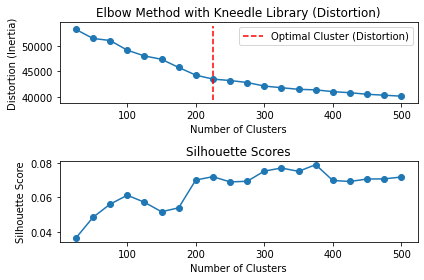

In [17]:
clustering_validation(anime_matrix)

Based on Kneed library the elbow is located at 225 clusters. The silhouette score itself solidify the elbow method results, so the number of cluster is 225, with on average ~69 animes clustered together

**Anime Clustering**

In [18]:
model = AgglomerativeClustering(n_clusters=225, metric='cosine', linkage='average')
cluster_labels = model.fit_predict(anime_matrix)

anime_matrix_clustered = anime_matrix.copy()
anime_matrix_clustered['cluster'] = cluster_labels

In [19]:
anime_matrix_clustered

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,doc2vec_119,doc2vec_120,doc2vec_121,doc2vec_122,doc2vec_123,doc2vec_124,doc2vec_125,doc2vec_126,doc2vec_127,cluster
0,0.942332,-0.704526,0.149750,1.174714,0.559385,0.065916,0.965944,-0.318397,-0.248492,0.267967,...,0.122886,0.107481,0.425429,-0.111431,-0.053307,0.080125,0.154999,0.210255,0.219002,105
1,0.762227,-0.332417,0.438148,1.239904,-0.137455,0.153406,0.912076,0.152956,-0.478969,-0.491450,...,0.042098,0.141542,0.217519,0.007156,0.116201,-0.010120,-0.003292,0.399483,-0.042419,105
2,1.403889,-0.941954,-0.187070,0.726876,0.247647,0.574115,-0.007779,-0.135157,-0.579149,0.538382,...,0.171876,0.244156,0.098212,-0.253252,0.087280,0.178244,0.021244,0.300262,-0.089522,26
3,1.363266,-0.934109,-0.254268,0.422929,0.519227,0.611879,0.281141,0.310624,0.296622,0.082539,...,0.158872,0.018561,0.190270,-0.093979,-0.006787,-0.000601,0.130643,0.246605,-0.084172,5
4,0.901093,-0.504873,-0.168858,0.760548,0.312645,-0.513937,-1.046101,-0.025810,0.357533,0.511056,...,-0.000128,-0.002921,0.227039,-0.062659,0.065490,0.229460,-0.032004,0.327543,0.031047,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685,1.631892,-0.182982,-0.000739,-0.369038,-0.801526,0.090638,0.211424,-0.580238,-0.049830,-0.073121,...,0.103181,-0.033768,0.174128,-0.011073,-0.010614,0.027676,-0.051863,0.250260,0.021374,39
15686,0.907669,0.951986,-0.528081,-0.340854,0.695521,1.189227,-0.170835,-0.370341,-0.183748,-0.583425,...,0.247147,-0.019933,0.278298,0.040464,-0.075198,-0.008811,-0.126398,0.280839,0.017216,190
15687,1.175433,0.684666,-0.293328,-0.629795,-0.304608,0.923807,0.252398,-0.408648,0.375807,0.201778,...,0.150098,0.065184,0.140142,0.062743,-0.029564,-0.022983,-0.117690,0.234817,-0.045516,190
15688,2.154834,0.083595,0.049755,0.055484,-0.941963,-0.074365,-0.614652,-0.695766,-0.200032,-0.278074,...,0.119603,0.019171,0.066250,0.010174,0.020648,0.030573,-0.106638,0.203385,-0.021968,30


Now the anime matrix got new feature which is cluster. Cluster feature will be used to generate anime recommendation later

### Generate Anime Recommendations Based on Weighted Score

Weighted score for anime recommendation are inspired by this [paper](https://ieeexplore.ieee.org/abstract/document/9154163) where it use a custom weight to be multiplied with movie features for a movie recommendation system. In this recommendation system, the features that will be considered are Score (anime rating), similarity (cosine similarity), cluster (only recommend anime within cluster), and scored by (how many users rate the anime). Here, I will be putting emphasis on the similarities so that more similar animes get highly recommended compared to the one that aren't, but since I don't want to recommend bad animes either, Score (anime ratings) and popularity followed with equal weighting on the remaining weight allocation. Score (anime ratings) is for how good the anime is and popularity will be to reach a broader audience taste.

The final weight will be 0.5 for similarity score, 0.25 for score, and lastly, 0.25 for popularity

**Getting All the Needed Features and Scaling the Data**

Since the needed features are not in the anime matrix, I will get the needed features then scaled it using MinMaxScaler

In [20]:
merged_df = pd.merge(merged_df, first_dataset[['anime_id', 'Score', 'Scored By', 'Image URL']], on='anime_id', how='inner')

merged_df

,anime_id,Name,Genres,Rating,Type,Synopsis,Producers,Studios,Source,themes,themes_genres,Score,Scored By,Image URL
0,1,Cowboy Bebop,"Action, Award Winning, Sci-Fi",R - 17+,TV,crime is timeless by the year humanity has exp...,[Bandai Visual],[Sunrise],Original,"Adult Cast, Space","[Adult Cast, Space, Action, Award Winning, Sci...",8.75,914193.0,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: The Movie,"Action, Sci-Fi",R - 17+,Movie,another day another bountysuch is the life of ...,"[Sunrise, Bandai Visual]",[Bones],Original,"Adult Cast, Space","[Adult Cast, Space, Action, Sci-Fi]",8.38,206248.0,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,"Action, Adventure, Sci-Fi",PG-13 - Teens 13 or older,TV,vash the stamped is the man with a bounty on h...,[Victor Entertainment],[Madhouse],Manga,Adult Cast,"[Adult Cast, Action, Adventure, Sci-Fi]",8.22,356739.0,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,"Action, Drama, Mystery, Supernatural",PG-13 - Teens 13 or older,TV,robin some is a powerful craft user drafted in...,"[Bandai Visual, Dentsu, Victor Entertainment, ...",[Sunrise],Original,Detective,"[Detective, Action, Drama, Mystery, Supernatural]",7.25,42829.0,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Beet the Vandel Buster,"Adventure, Fantasy, Supernatural",PG - Children,TV,it is the dark century and the people are suff...,"[TV Tokyo, Dentsu]",[Toei Animation],Manga,,"[Adventure, Fantasy, Supernatural]",6.94,6413.0,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685,55355,Lee's Detective Agency: A Day in Lungmen - Hom...,"Action, Comedy, Mystery",PG-13 - Teens 13 or older,ONA,infiltrating disguising and raiding tonight a ...,[UNKNOWN],"[HMCH, Gravity Well]",Game,"Anthropomorphic, Detective","[Anthropomorphic, Detective, Action, Comedy, M...",5.99,129.0,https://cdn.myanimelist.net/images/anime/1865/...
15686,55404,Slash,UNKNOWN,PG-13 - Teens 13 or older,Music,music video for the song slash by gama the son...,[MAZRI],[UNKNOWN],Original,Music,"[Music, UNKNOWN]",6.45,152.0,https://cdn.myanimelist.net/images/anime/1290/...
15687,55517,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN,PG-13 - Teens 13 or older,Special,recap of the first seven episodes of the idolm...,[UNKNOWN],[CygamesPictures],Web manga,"Idols (Female), Music","[Idols (Female), Music, UNKNOWN]",6.07,114.0,https://cdn.myanimelist.net/images/anime/1597/...
15688,55647,One Piece: Recapping Fierce Fights! The Counte...,"Action, Adventure, Comedy, Fantasy",PG-13 - Teens 13 or older,Special,this is the th recap special of the when arc,[UNKNOWN],[UNKNOWN],Manga,,"[Action, Adventure, Comedy, Fantasy]",6.29,320.0,https://cdn.myanimelist.net/images/anime/1981/...


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

anime_matrix_clustered['score'] = scaler.fit_transform(merged_df['Score'].values.reshape(-1,1))
anime_matrix_clustered['popularity'] = scaler.fit_transform(merged_df['Scored By'].values.reshape(-1,1))

anime_matrix_clustered

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,doc2vec_121,doc2vec_122,doc2vec_123,doc2vec_124,doc2vec_125,doc2vec_126,doc2vec_127,cluster,score,popularity
0,0.942332,-0.704526,0.149750,1.174714,0.559385,0.065916,0.965944,-0.318397,-0.248492,0.267967,...,0.425429,-0.111431,-0.053307,0.080125,0.154999,0.210255,0.219002,105,0.951724,0.343540
1,0.762227,-0.332417,0.438148,1.239904,-0.137455,0.153406,0.912076,0.152956,-0.478969,-0.491450,...,0.217519,0.007156,0.116201,-0.010120,-0.003292,0.399483,-0.042419,105,0.900690,0.077476
2,1.403889,-0.941954,-0.187070,0.726876,0.247647,0.574115,-0.007779,-0.135157,-0.579149,0.538382,...,0.098212,-0.253252,0.087280,0.178244,0.021244,0.300262,-0.089522,26,0.878621,0.134034
3,1.363266,-0.934109,-0.254268,0.422929,0.519227,0.611879,0.281141,0.310624,0.296622,0.082539,...,0.190270,-0.093979,-0.006787,-0.000601,0.130643,0.246605,-0.084172,5,0.744828,0.016059
4,0.901093,-0.504873,-0.168858,0.760548,0.312645,-0.513937,-1.046101,-0.025810,0.357533,0.511056,...,0.227039,-0.062659,0.065490,0.229460,-0.032004,0.327543,0.031047,211,0.702069,0.002373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685,1.631892,-0.182982,-0.000739,-0.369038,-0.801526,0.090638,0.211424,-0.580238,-0.049830,-0.073121,...,0.174128,-0.011073,-0.010614,0.027676,-0.051863,0.250260,0.021374,39,0.571034,0.000011
15686,0.907669,0.951986,-0.528081,-0.340854,0.695521,1.189227,-0.170835,-0.370341,-0.183748,-0.583425,...,0.278298,0.040464,-0.075198,-0.008811,-0.126398,0.280839,0.017216,190,0.634483,0.000020
15687,1.175433,0.684666,-0.293328,-0.629795,-0.304608,0.923807,0.252398,-0.408648,0.375807,0.201778,...,0.140142,0.062743,-0.029564,-0.022983,-0.117690,0.234817,-0.045516,190,0.582069,0.000005
15688,2.154834,0.083595,0.049755,0.055484,-0.941963,-0.074365,-0.614652,-0.695766,-0.200032,-0.278074,...,0.066250,0.010174,0.020648,0.030573,-0.106638,0.203385,-0.021968,30,0.612414,0.000083


In [22]:
model_matrix = anime_matrix_clustered.copy()

model_matrix['anime_name'] = merged_df['Name']
model_matrix['genres'] = merged_df['themes_genres']
model_matrix['rating'] = merged_df['Rating']
model_matrix['type'] = merged_df['Type']
model_matrix['poster_link'] = merged_df['Image URL']

model_matrix

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10,...,doc2vec_126,doc2vec_127,cluster,score,popularity,anime_name,genres,rating,type,poster_link
0,0.942332,-0.704526,0.149750,1.174714,0.559385,0.065916,0.965944,-0.318397,-0.248492,0.267967,...,0.210255,0.219002,105,0.951724,0.343540,Cowboy Bebop,"[Adult Cast, Space, Action, Award Winning, Sci...",R - 17+,TV,https://cdn.myanimelist.net/images/anime/4/196...
1,0.762227,-0.332417,0.438148,1.239904,-0.137455,0.153406,0.912076,0.152956,-0.478969,-0.491450,...,0.399483,-0.042419,105,0.900690,0.077476,Cowboy Bebop: The Movie,"[Adult Cast, Space, Action, Sci-Fi]",R - 17+,Movie,https://cdn.myanimelist.net/images/anime/1439/...
2,1.403889,-0.941954,-0.187070,0.726876,0.247647,0.574115,-0.007779,-0.135157,-0.579149,0.538382,...,0.300262,-0.089522,26,0.878621,0.134034,Trigun,"[Adult Cast, Action, Adventure, Sci-Fi]",PG-13 - Teens 13 or older,TV,https://cdn.myanimelist.net/images/anime/7/203...
3,1.363266,-0.934109,-0.254268,0.422929,0.519227,0.611879,0.281141,0.310624,0.296622,0.082539,...,0.246605,-0.084172,5,0.744828,0.016059,Witch Hunter Robin,"[Detective, Action, Drama, Mystery, Supernatural]",PG-13 - Teens 13 or older,TV,https://cdn.myanimelist.net/images/anime/10/19...
4,0.901093,-0.504873,-0.168858,0.760548,0.312645,-0.513937,-1.046101,-0.025810,0.357533,0.511056,...,0.327543,0.031047,211,0.702069,0.002373,Beet the Vandel Buster,"[Adventure, Fantasy, Supernatural]",PG - Children,TV,https://cdn.myanimelist.net/images/anime/7/215...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685,1.631892,-0.182982,-0.000739,-0.369038,-0.801526,0.090638,0.211424,-0.580238,-0.049830,-0.073121,...,0.250260,0.021374,39,0.571034,0.000011,Lee's Detective Agency: A Day in Lungmen - Hom...,"[Anthropomorphic, Detective, Action, Comedy, M...",PG-13 - Teens 13 or older,ONA,https://cdn.myanimelist.net/images/anime/1865/...
15686,0.907669,0.951986,-0.528081,-0.340854,0.695521,1.189227,-0.170835,-0.370341,-0.183748,-0.583425,...,0.280839,0.017216,190,0.634483,0.000020,Slash,"[Music, UNKNOWN]",PG-13 - Teens 13 or older,Music,https://cdn.myanimelist.net/images/anime/1290/...
15687,1.175433,0.684666,-0.293328,-0.629795,-0.304608,0.923807,0.252398,-0.408648,0.375807,0.201778,...,0.234817,-0.045516,190,0.582069,0.000005,The IDOLM@STER Cinderella Girls: U149 Recap,"[Idols (Female), Music, UNKNOWN]",PG-13 - Teens 13 or older,Special,https://cdn.myanimelist.net/images/anime/1597/...
15688,2.154834,0.083595,0.049755,0.055484,-0.941963,-0.074365,-0.614652,-0.695766,-0.200032,-0.278074,...,0.203385,-0.021968,30,0.612414,0.000083,One Piece: Recapping Fierce Fights! The Counte...,"[Action, Adventure, Comedy, Fantasy]",PG-13 - Teens 13 or older,Special,https://cdn.myanimelist.net/images/anime/1981/...


The above dataframe consists of the needed features to generate the recommendation lists. It will be used as a model for the recommendation system. It will computer similarities of other anime within the same cluster as the anime that is being queried and then compute the respective weight of similarities, score, and popularity to generate the weighted score. The final anime recommendation will be the descending values of these weighted score. Five animes will be recommended for each iterations until there are no animes left to iterate in the cluster. 

**Anime Recommendations Test Against ChatGPT**

The anime recommendations test is to show if the recommendation system works by using the anime matrix dataframe. It will be tested for several popular animes in action, sports, drama, suspense genres

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_anime(df, query_anime_name):
    # Step 1: Query anime based on anime_name
    query_anime = df[df['anime_name'] == query_anime_name]

    if query_anime.empty:
        print(f"Anime '{query_anime_name}' not found.")
        return

    # Step 2: Get animes in the same cluster
    cluster_id = query_anime['cluster'].values[0]
    cluster_animes = df[df['cluster'] == cluster_id]

    # Step 3: Compute cosine similarities
    query_vector = query_anime.iloc[:, :305].values 
    cluster_vectors = cluster_animes.iloc[:, :305].values

    similarities = cosine_similarity(query_vector, cluster_vectors)[0]

    # Step 4: Calculate weighted score
    weighted_score = 0.5 * similarities + 0.25 * cluster_animes['score'] + 0.25 * cluster_animes['popularity']
    cluster_animes = cluster_animes.copy()
    cluster_animes.loc[:, 'weighted_score'] = weighted_score

    # Step 5: Exclude the queried anime and sort by weighted score in descending order
    sorted_animes = cluster_animes[cluster_animes['anime_name'] != query_anime_name].sort_values(
        by='weighted_score', ascending=False
    )

    # Step 6: Display recommendation lists information
    top_animes = sorted_animes[['anime_name', 'genres', 'rating', 'type']]
    
    return top_animes

**Testing Recommendation List for The Most Popular Anime in Action Genres**

Most popular anime in the action genres is Attack on Titan. The following is the results from ChatGPT along with the prompt I used

<img src="Screenshots/Attack on Titan Recommendation.PNG" width="350"/>&nbsp;

In [25]:
aot = recommend_anime(model_matrix, 'Attack on Titan')

aot

,anime_name,genres,rating,type
8490,Attack on Titan Season 2,"[Gore, Military, Survival, Action, Drama, Susp...",R - 17+,TV
12411,Attack on Titan Season 3 Part 2,"[Gore, Military, Survival, Action, Drama]",R - 17+,TV
11168,Attack on Titan Season 3,"[Gore, Military, Survival, Action, Drama]",R - 17+,TV
13058,Attack on Titan: Final Season,"[Gore, Military, Survival, Action, Drama]",R - 17+,TV
14382,Attack on Titan: Final Season Part 2,"[Gore, Military, Survival, Action, Drama]",R - 17+,TV
15170,Attack on Titan: The Final Season - Final Chap...,"[Gore, Military, Survival, Action, Drama, Susp...",R - 17+,Special
7412,Attack on Titan OAD,"[Gore, Survival, Action, Drama]",R - 17+,OVA
13787,Attack on Titan: Chronicle,"[Gore, Military, Survival, Action, Drama]",R - 17+,Movie
11571,Attack on Titan: The Roar of Awakening,"[Gore, Survival, Action, Drama]",R - 17+,Movie
8491,Attack on Titan: No Regrets,[Action],R - 17+,OVA


The recommendation system strugled to recognize other similar animes other than adaptation of Attack on Titan itself compared to ChatGPT. This might be the results of clustering algorithm I chose, which is cosine similarity, so it produce bias where very similar anime gets clustered together and hard to recognize other similar anime. Another reason would be that Attack on Titan is unique enough that it would be only clustered with its other adaptation

**Testing Recommendation List for The Most Popular Anime in Sports Genres**

Most popular anime in the sports genres is Haikyu!! The following is the results from ChatGPT along with the prompt I used.

<img src="Screenshots/Haikyuu!! Recommendation.PNG" width="350"/>&nbsp;

In [30]:
haikyu = recommend_anime(model_matrix, 'Haikyu!!')

haikyu.head(10)

,anime_name,genres,rating,type
8798,Haikyu!! 2nd Season,"[School, Team Sports, Sports]",PG-13 - Teens 13 or older,TV
9736,My Hero Academia,"[School, Super Power, Action]",PG-13 - Teens 13 or older,TV
10085,Haikyu!! 3rd Season,"[School, Team Sports, Sports]",PG-13 - Teens 13 or older,TV
12574,Haikyu!! To the Top,"[School, Team Sports, Sports]",PG-13 - Teens 13 or older,TV
13391,Haikyu!! TO THE TOP 2nd-cour,"[School, Team Sports, Sports]",PG-13 - Teens 13 or older,TV
10310,My Hero Academia Season 2,"[School, Super Power, Action]",PG-13 - Teens 13 or older,TV
11448,My Hero Academia Season 3,"[School, Super Power, Action]",PG-13 - Teens 13 or older,TV
13163,Haikyu!! Land vs. Air,"[School, Team Sports, Sports]",PG-13 - Teens 13 or older,OVA
12352,My Hero Academia Season 4,"[School, Super Power, Action]",PG-13 - Teens 13 or older,TV
7917,Blue Spring Ride,"[School, Romance]",PG-13 - Teens 13 or older,TV


In this case, the recommendation system provided a unique perspective on Haikyu!! where it recommends anime such as My Hero Academia, while ChatGPT recommended sports anime more. This could be because of the very similar synopsis themes present in Haikyu!! and My Hero Academia 

**Testing Recommendation List for The Most Popular Anime in Drama Genres**

Most popular anime in the drama genres is Your Name. The following is the results from ChatGPT along with the prompt I used.

<img src="Screenshots/Your Name. Recommendation.PNG" width="350"/>&nbsp;

In [27]:
your_name = recommend_anime(model_matrix, 'Your Name.')

your_name.head(10)

,anime_name,genres,rating,type
8791,A Silent Voice,"[Romantic Subtext, Award Winning, Drama]",PG-13 - Teens 13 or older,Movie
12555,Weathering with You,"[Award Winning, Drama, Fantasy, Romance]",PG-13 - Teens 13 or older,Movie
13541,A Whisker Away,"[School, Award Winning, Comedy, Drama, Romance...",PG-13 - Teens 13 or older,Movie
7160,The Garden of Words,"[Visual Arts, Award Winning, Drama, Romance]",PG-13 - Teens 13 or older,Movie
12436,Ride Your Wave,"[Drama, Romance, Supernatural]",PG-13 - Teens 13 or older,Movie
542,Grave of the Fireflies,"[Historical, Drama]",PG-13 - Teens 13 or older,Movie
12178,Violet Evergarden: The Movie,"[Award Winning, Drama, Fantasy]",PG-13 - Teens 13 or older,Movie
1535,5 Centimeters per Second,"[Drama, Romance]",PG-13 - Teens 13 or older,Movie
11307,I Want To Eat Your Pancreas,"[School, Drama, Romance]",PG-13 - Teens 13 or older,Movie
13398,"Josee, the Tiger and the Fish","[Visual Arts, Drama, Romance]",PG-13 - Teens 13 or older,Movie


In drama section, it seems the recommendation system is able to give a similar results to ChatGPT. The recommendation system even able to recommend anime that are less known like Ride Your Wave. This prove to be an interesting and good result

**Testing Recommendation List for The Most Popular Anime in Suspense Genres**

Most popular anime in the drama genres is Death Note. The following is the results from ChatGPT along with the prompt I used.

<img src="Screenshots/Death Note Recommendation.PNG" width="350"/>&nbsp;

In [28]:
death_note = recommend_anime(model_matrix, 'Death Note')

death_note.head(10)

,anime_name,genres,rating,type
8683,Death Parade,"[Adult Cast, High Stakes Game, Psychological, ...",R - 17+,TV
2720,Kaiji: Ultimate Survivor,"[Adult Cast, High Stakes Game, Psychological, ...",R - 17+,TV
9,Monster,"[Adult Cast, Psychological, Drama, Mystery, Su...",R - 17+,TV
5940,Kaiji: Against All Rules,"[Adult Cast, High Stakes Game, Psychological, ...",R - 17+,TV
2714,Death Note: Relight,"[Psychological, Supernatural, Suspense]",R - 17+,Special
615,Akagi,"[Adult Cast, High Stakes Game, Organized Crime...",R - 17+,TV
3832,Mouryou no Hako,"[Detective, Historical, Psychological, Mystery...",R - 17+,TV
2706,Neuro: Supernatural Detective,"[Detective, Mythology, Comedy, Mystery, Supern...",R - 17+,TV
14839,Tomodachi Game,"[High Stakes Game, Psychological, Strategy Gam...",R - 17+,TV
10028,B: The Beginning,"[Detective, Psychological, Action, Mystery, Su...",R - 17+,ONA


The same case happens in suspense like in the drama. The recommendation system provide similar results to ChatGPT and even provided animes that are less known like Neuro: Supernatural Detective and B: The Beginning

### Saving the Anime Matrix as Pickle

The final step is to export the anime matrix dataframe into pickle format 

In [32]:
file_path = "Model/model_matrix.pkl"

try:
    model_matrix.to_pickle(file_path)
    print(f"Model matrix saved to {file_path} successfully.")
except Exception as e:
    print(f"Error saving Model matrix to {file_path}: {e}")

Model matrix saved to Model/model_matrix.pkl successfully.
